In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_54554_I')

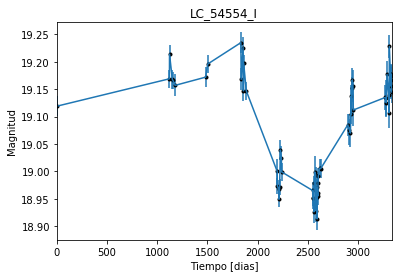

In [2]:
data = np.genfromtxt('LC_54554_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_54554_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

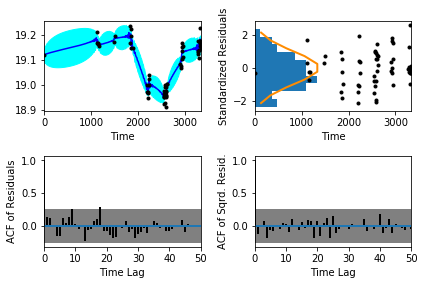

In [5]:
sample.assess_fit()

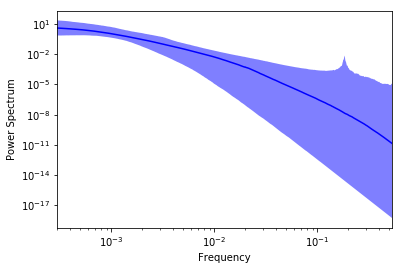

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_54554_I')

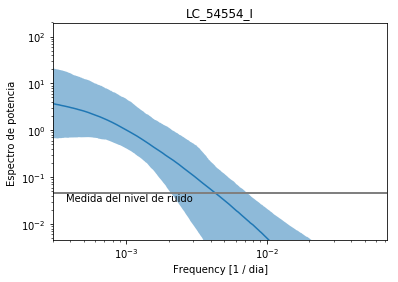

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_54554_I')

Text(0.5,1,'Prediccion , valor esperado LC_54554_I')

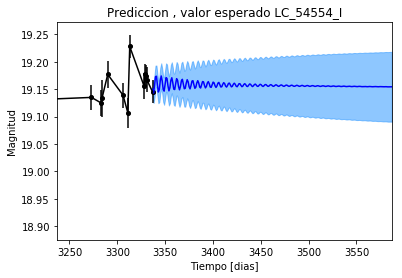

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_54554_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_54554_I')

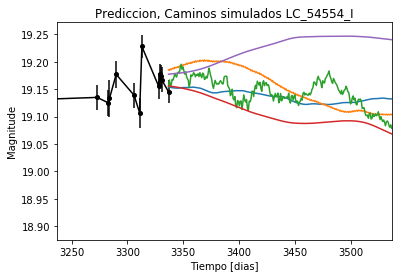

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_54554_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_54554_I')

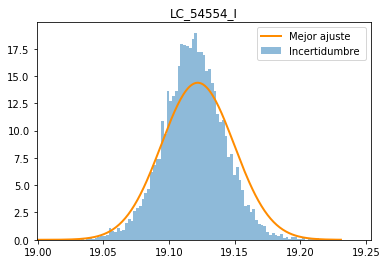

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_54554_I')

Text(0.5,1,'Interpolacion, camino simulado 54554_I')

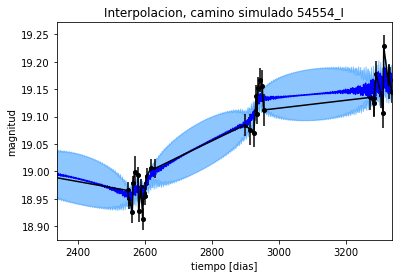

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado 54554_I')

Text(0.5,1,'Interpolacion, camino simulado LC_54554_I')

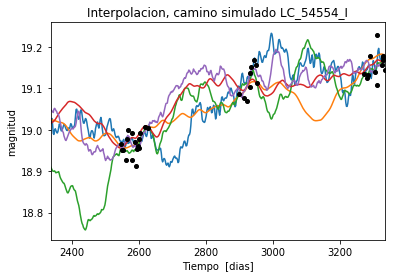

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_54554_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 766.754467423
Median: 0.00938966435147
Standard deviation: 0.196177627069
68% credibility interval: [ 0.00090888  0.14818117]
95% credibility interval: [  3.48517853e-04   7.99879095e-01]
99% credibility interval: [  3.10057662e-04   9.86172585e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 581.159062727
Median: 0.00262317592995
Standard deviation: 0.0782134347695
68% credibility interval: [ 0.00047828  0.02806873]
95% credibility interval: [ 0.00032407  0.21588879]
99% credibility interval: [  3.04940644e-04   5.92249958e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 455.257866955
Median: 0.0478589103081
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 420.457920973
Median: 138.161779377
Standard deviation: 1.9980492042
68% credibility interval: [ 136.36985835  139.73847438]
95% credibility interval: [ 133.90673847  142.92394697]
99% credibility interval: [ 132.07842389  143.77390449]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 511.492111041
Median: 0.958127282801
Standard deviation: 2.21576647137
68% credibility interval: [ 0.10437705  4.21264548]
95% credibility interval: [ 0.02040968  7.42186747]
99% credibility interval: [  0.01198936  10.27292994]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 656.532405319
Median: 0.968289102272
Standard deviation: 9.19477363528
68% credibility interval: [ 0.02103296  9.42558424]
95% credibility interval: [  9.72139054e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3510.21608132
Median: 6.11445084971e-19
Standard deviation: 7.30701754159e+145
68% credibility interval: [  5.75724602e-45   1.31855033e-02]
95% credibility interval: [  7.00975450e-60   1.81299273e+71]
99% credibility interval: [  7.27443580e-69   2.22847589e+89]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2618.19352438
Median: 19.1177847229
Standard deviation: 0.0468366782747
68% credibility interval: [ 19.07960772  19.15807222]
95% credibility interval: [ 19.02960986  19.21607748]
99% credibility interval: [ 18.98912542  19.27239917]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 318.685421745
Median: 0.0231980704319
Standard deviation: 0.248659293975
68% credibility interval: [ 0.          0.39146769]
95% credibility interval: [ 0.          0.85713364]
99% credibility interval: [ 0.          1.02305777]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 318.685421745
Median: 0.0231980704319
Standard deviation: 0.248659293975
68% credibility interval: [ 0.          0.39146769]
95% credibility interval: [ 0.          0.85713364]
99% credibility interval: [ 0.          1.02305777]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1048.48376856
Median: 0.0
Standard deviation: 0.00037871847742
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 420.457920973
Median: 138.161779377
Standard deviation: 1.9980492042
68% credibility interval: [ 136.36985835  139.73847438]
95% credibility interval: [ 133.90673847  142.92394697]
99% credibility interval: [ 132.07842389  143.77390449]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1543.90756536
Median: 0.00802751347716
Standard deviation: 0.0109061085698
68% credibility interval: [ 0.00490457  0.01464355]
95% credibility interval: [ 0.00338513  0.03392228]
99% credibility interval: [ 0.00272729  0.07248534]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 491.601338497
Median: 1.41029041059
Standard deviation: 0.245526296084
68% credibility interval: [ 1.15937161  1.66306221]
95% credibility interval: [ 0.89854798  1.88049211]
99% credibility interval: [ 0.82242376  1.9713637 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 704.151800474
Median: 0.00027469006009
Standard deviation: 0.130534457993
68% credibility interval: [  1.47172671e-06   1.91261774e-02]
95% credibility interval: [  8.33076215e-76   3.22121167e-01]
99% credibility interval: [  1.21491667e-94   8.63746589e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 766.754467423
Median: (-0.0589970010925-4.97239409716j)
Standard deviation: 1.99006547564
68% credibility interval: [-0.93104978+0.j         -0.00571065-0.23150085j]
95% credibility interval: [ -5.02578858e+00+0.j          -2.18980225e-03-0.01734683j]
99% credibility interval: [ -6.19630510e+00+0.j          -1.94814974e-03-0.02156066j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 581.159062727
Median: (-0.0164819004612+0.201253116056j)
Standard deviation: 1.63783715425
68% credibility interval: [-0.17636100+1.49299064j -0.00300509+0.24907745j]
95% credibility interval: [-1.35646926+0.89295833j -0.00203617+0.j        ]
99% credibility interval: [ -3.72121623e+00+1.78454011j  -1.91599857e-03+0.j        ]
Posterior sum